### Feature Engineering & Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [ ]:
file_path = r'/loan_api_project/data/cleaned_loan_data.csv'
df = pd.read_csv(file_path)

print("File loaded successfully!")
display(df.head())

File loaded successfully!


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-11-02,2021-09-13,2021-04-13,Charged Off,2021-05-13,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-05-01,2021-12-12,2021-09-01,Charged Off,2021-09-02,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-12-03,Fully Paid,2021-12-04,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


#### Get Target Variable

In [4]:
df['loan_default'] = np.where(df['loan_status'] == 'Charged Off', 1, 0)

In [5]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_default
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-11-02,2021-09-13,2021-04-13,Charged Off,2021-05-13,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,1
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,0
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-05-01,2021-12-12,2021-09-01,Charged Off,2021-09-02,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,1
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-12-03,Fully Paid,2021-12-04,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,0
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,0


In [6]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'loan_default'],
      dtype='object')

##### Drop Irrelevant Column

- highly correlated columns to drop from data explorations step
- columns only important after loan issue
- irrelevant columns (e.g. id, member_id)

In [7]:
drop_cols = [
    'id', 'member_id', 'emp_title', 'issue_date',
    'last_payment_date', 'next_payment_date', 'last_credit_pull_date',
    'total_payment', 'loan_status', 'application_type'
]

In [8]:
df = df.drop(columns=drop_cols)

In [9]:
df.columns

Index(['address_state', 'emp_length', 'grade', 'home_ownership', 'purpose',
       'sub_grade', 'term', 'verification_status', 'annual_income', 'dti',
       'installment', 'int_rate', 'loan_amount', 'total_acc', 'loan_default'],
      dtype='object')

In [10]:
target = 'loan_default'
X = df.drop(columns=[target])
y = df[target]

##### Train/Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

##### Engineering Features

In [12]:
df.columns

Index(['address_state', 'emp_length', 'grade', 'home_ownership', 'purpose',
       'sub_grade', 'term', 'verification_status', 'annual_income', 'dti',
       'installment', 'int_rate', 'loan_amount', 'total_acc', 'loan_default'],
      dtype='object')

For the emp_length column, in the EDA I noticed that the value of this column is if it the year is long or not.

So I will turn this into a binary column.

In [13]:
X_train['emp_length'].unique()

array(['4 years', '1 year', '< 1 year', '10+ years', '7 years', '5 years',
       '3 years', '2 years', '9 years', '8 years', '6 years'],
      dtype=object)

In [14]:
emp_length_short_term = ['< 1 year', '1 year', '2 years','3 years', '4 years', '5 years']

In [15]:
X_train['emp_length_ft'] = np.where(X_train['emp_length'].isin(emp_length_short_term), 0, 1)

In [16]:
X_test['emp_length_ft'] = np.where(X_test['emp_length'].isin(emp_length_short_term), 0, 1)

For the address_state and purpose columns, to avoid the curse of dimensionality. I will encode with it's value counts

In [17]:
X_train['address_state_ft'] = X_train['address_state'].map(X_train['address_state'].value_counts())

In [18]:
X_test['address_state_ft'] = X_test['address_state'].map(X_test['address_state'].value_counts())

In [19]:
X_train['purpose_ft'] = X_train['purpose'].map(X_train['purpose'].value_counts())

In [20]:
X_test['purpose_ft'] = X_test['purpose'].map(X_test['purpose'].value_counts())

For Grade and subgrade I will labelEncode to keep ranking

In [21]:
grade_map = {g: i for i, g in enumerate("ABCDEFG", start=1)}
X_train['grade_ft'] = X_train['grade'].map(grade_map)

In [22]:
X_test['grade_ft'] = X_test['grade'].map(grade_map)

In [23]:
subgrade_map = {}
idx = 1
for g in "ABCDEFG":
    for n in range(1,6):
        subgrade_map[f'{g}{n}'] = idx
        idx += 1
X_train['sub_grade_ft'] = X_train['sub_grade'].map(subgrade_map)
X_test['sub_grade_ft'] = X_test['sub_grade'].map(subgrade_map)

For term, verification_status, and home_ownership, I will one hot encode

In [24]:
ohe_cols = ['term', 'verification_status', 'home_ownership']

In [25]:
for col in ohe_cols:
    X_train_ohe = pd.get_dummies(X_train[col], prefix=col).astype(int)
    X_train = pd.concat([X_train, X_train_ohe], axis=1)

    X_test_ohe = pd.get_dummies(X_test[col], prefix=col).astype(int)
    X_test = pd.concat([X_test, X_test_ohe], axis=1)
display(X_train.head())

,address_state,emp_length,grade,home_ownership,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,emp_length_ft,address_state_ft,purpose_ft,grade_ft,sub_grade_ft,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
696,MD,4 years,A,RENT,car,A4,36 months,Source Verified,70000.0,0.1678,186.06,0.0729,6000,11,0,798,1195,1,4,1,0,0,1,0,0,0,0,0,1
28192,MD,1 year,D,RENT,house,D3,60 months,Verified,85000.0,0.1491,351.49,0.1649,14300,21,0,798,296,4,18,0,1,0,0,1,0,0,0,0,1
31360,MD,< 1 year,B,RENT,moving,B5,36 months,Source Verified,12240.0,0.1745,105.42,0.1036,3250,11,0,798,438,2,10,1,0,0,1,0,0,0,0,0,1
3553,NJ,10+ years,C,RENT,credit card,C3,36 months,Not Verified,72000.0,0.0105,81.05,0.1316,2400,7,1,1443,3999,3,13,1,0,1,0,0,0,0,0,0,1
25211,MI,10+ years,A,MORTGAGE,home improvement,A1,36 months,Not Verified,65000.0,0.2904,60.32,0.0542,2000,34,1,556,2260,1,1,1,0,1,0,0,1,0,0,0,0


In [26]:
df.keys()

Index(['address_state', 'emp_length', 'grade', 'home_ownership', 'purpose',
       'sub_grade', 'term', 'verification_status', 'annual_income', 'dti',
       'installment', 'int_rate', 'loan_amount', 'total_acc', 'loan_default'],
      dtype='object')

Financial Ratio Features

In [27]:
X_train['monthly_income'] = X_train['annual_income'] / 12


# Payment burden ratios
X_train['payment_to_income_ratio'] = X_train['installment'] / X_train['monthly_income']
X_train['loan_to_income_ratio'] = X_train['loan_amount'] / X_train['annual_income']


# Residual income approximation
X_train['residual_income'] = X_train['monthly_income'] - X_train['installment']

In [28]:
X_test['monthly_income'] = X_test['annual_income'] / 12


# Payment burden ratios
X_test['payment_to_income_ratio'] = X_test['installment'] / X_test['monthly_income']
X_test['loan_to_income_ratio'] = X_test['loan_amount'] / X_test['annual_income']


# Residual income approximation
X_test['residual_income'] = X_test['monthly_income'] - X_test['installment']

Credit History Features

In [29]:
X_train['is_new_credit_user'] = (X_train['total_acc'] < 5).astype(int)
X_train['log_total_acc'] = np.log1p(X_train['total_acc'])

X_test['is_new_credit_user'] = (X_test['total_acc'] < 5).astype(int)
X_test['log_total_acc'] = np.log1p(X_test['total_acc'])

Loan Term and Interest Burden

In [30]:
X_train['term_months'] = X_train['term'].str.extract('(\d+)').astype(int)
X_train['interest_burden_ratio'] = X_train['installment'] * X_train['term_months'] / X_train['loan_amount']

X_test['term_months'] = X_test['term'].str.extract('(\d+)').astype(int)
X_test['interest_burden_ratio'] = X_test['installment'] * X_test['term_months'] / X_test['loan_amount']


#### Binning Financial Ratio Features

In [31]:
def bin_and_add_feature(df, column_name, num_bins=3, labels=None):
    """
    Bins a numerical column into quantiles and adds it as a new categorical feature.
    """
    if labels is None:
        labels = [f'{column_name}_Low', f'{column_name}_Medium', f'{column_name}_High']

    # Handle cases where there might be too few unique values for the desired number of bins
    unique_values = df[column_name].nunique()
    actual_num_bins = min(num_bins, unique_values)

    if actual_num_bins < 2:
        # If not enough unique values to bin, create a single category or handle as appropriate
        df[f'{column_name}_binned'] = df[column_name].apply(lambda x: labels[0])
    else:
        # qcut for quantile-based binning
        df[f'{column_name}_binned'] = pd.qcut(
            df[column_name],
            q=actual_num_bins,
            labels=labels[:actual_num_bins],
            duplicates='drop'
        )
    return df

# Define columns to bin and their labels
features_to_bin = {
    'payment_to_income_ratio': ['PTI_Low', 'PTI_Medium', 'PTI_High'],
    'loan_to_income_ratio': ['LTI_Low', 'LTI_Medium', 'LTI_High'],
    'residual_income': ['ResInc_Low', 'ResInc_Medium', 'ResInc_High'],
    'interest_burden_ratio': ['IntBur_Low', 'IntBur_Medium', 'IntBur_High']
}

for feature, labels in features_to_bin.items():
    X_train = bin_and_add_feature(X_train, feature, num_bins=3, labels=labels)
    X_test = bin_and_add_feature(X_test, feature, num_bins=3, labels=labels)

print("New binned features added to X_train and X_test.")


New binned features added to X_train and X_test.


#### Creating Interaction Features from Binned Ratios

In [32]:
binned_features = [
    'payment_to_income_ratio_binned',
    'loan_to_income_ratio_binned',
    'residual_income_binned',
    'interest_burden_ratio_binned'
]

X_train['risk_profile'] = X_train[binned_features].astype(str).agg('_'.join, axis=1)
X_test['risk_profile'] = X_test[binned_features].astype(str).agg('_'.join, axis=1)

print("Created 'risk_profile' interaction feature.")

display(X_train[['payment_to_income_ratio_binned', 'loan_to_income_ratio_binned', 'residual_income_binned', 'interest_burden_ratio_binned', 'risk_profile']].head())

Created 'risk_profile' interaction feature.


,payment_to_income_ratio_binned,loan_to_income_ratio_binned,residual_income_binned,interest_burden_ratio_binned,risk_profile
696,PTI_Low,LTI_Low,ResInc_Medium,IntBur_Low,PTI_Low_LTI_Low_ResInc_Medium_IntBur_Low
28192,PTI_Medium,LTI_Medium,ResInc_High,IntBur_High,PTI_Medium_LTI_Medium_ResInc_High_IntBur_High
31360,PTI_High,LTI_High,ResInc_Low,IntBur_Low,PTI_High_LTI_High_ResInc_Low_IntBur_Low
3553,PTI_Low,LTI_Low,ResInc_High,IntBur_Medium,PTI_Low_LTI_Low_ResInc_High_IntBur_Medium
25211,PTI_Low,LTI_Low,ResInc_Medium,IntBur_Low,PTI_Low_LTI_Low_ResInc_Medium_IntBur_Low


#### Fine Classing and WoE for some numerical variables

Weight of evidence which shows to what extent an independent variable would predict a dependent variable - log(%good/%bad) will be used to perform coarse classing.

In [33]:
#create a function to automate the calculations for all continuous variables
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable):
    df = pd.concat([df[discrete_variable_name], good_bad_variable], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [34]:
#create charts to visualize weight of evidence
def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

annual_income

In [35]:
X_train['annual_income'].unique()

array([ 70000.  ,  85000.  ,  12240.  ,  72000.  ,  65000.  , 110000.  ,
       285000.  ,  50000.  ,  87000.  , 180000.  ,  35000.  , 360000.  ,
        20000.  ,  80000.  , 100505.  ,  42000.  ,  30000.  , 150000.  ,
        48000.  ,  90000.  ,  44000.  ,  23000.  ,  29000.  ,  58800.  ,
        47000.  , 120000.  , 220000.  ,  84996.  ,  66996.  ,  74000.  ,
        54000.  , 140000.  ,  88000.  ,  38400.  ,  80569.  ,  79000.  ,
        25000.  ,  92259.  ,  83500.  ,  37000.  ,  36903.  ,  54996.  ,
        45000.  ,  26000.  , 350000.  ,  60000.  ,  33996.  , 125000.  ,
        43200.  , 158000.  ,  10200.  ,   8472.  ,  49441.6 ,  12600.  ,
        69900.  ,  38000.  ,  38272.  , 126000.  ,  57000.  ,  24000.  ,
        75000.  ,  47500.  ,  93233.  ,  55000.  ,  49000.  , 149981.  ,
        61000.  ,  64000.  ,  14400.  ,  29500.  ,  68000.  ,  96000.  ,
        32400.  ,  33600.  ,  42759.  , 108000.  ,  18000.  ,  42996.  ,
        84000.  ,  74256.  ,  52000.  , 121500.  , 

In [36]:
X_train['annual_inc_factor'] = pd.cut(X_train['annual_income'], 100)

In [37]:
df_temp = woe_ordered_continuous(X_train, 'annual_inc_factor', y_train)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3104.0, 12960.0]",149,0.261745,0.004830,39.0,110.0,0.009142,0.004138,0.792677,NaN,NaN,inf
1,"(12960.0, 21920.0]",855,0.184795,0.027716,158.0,697.0,0.037037,0.026220,0.345405,0.076950,0.447272,inf
2,"(21920.0, 30880.0]",2450,0.169388,0.079419,415.0,2035.0,0.097281,0.076553,0.239623,0.015408,0.105782,inf
3,"(30880.0, 39840.0]",3143,0.171492,0.101883,539.0,2604.0,0.126348,0.097957,0.254507,0.002104,0.014884,inf
4,"(39840.0, 48800.0]",4302,0.144351,0.139453,621.0,3681.0,0.145570,0.138472,0.049987,0.027141,0.204520,inf
5,"(48800.0, 57760.0]",3929,0.140494,0.127362,552.0,3377.0,0.129395,0.127036,0.018400,0.003858,0.031586,inf
6,"(57760.0, 66720.0]",3659,0.149768,0.118610,548.0,3111.0,0.128458,0.117030,0.093171,0.009274,0.074771,inf
7,"(66720.0, 75680.0]",2919,0.115108,0.094622,336.0,2583.0,0.078762,0.097167,-0.210000,0.034660,0.303171,inf
8,"(75680.0, 84640.0]",1883,0.125863,0.061039,237.0,1646.0,0.055556,0.061919,-0.108448,0.010755,0.101552,inf
9,"(84640.0, 93600.0]",1747,0.119634,0.056631,209.0,1538.0,0.048992,0.057857,-0.166309,0.006229,0.057861,inf


The number of observations become smaller as annual income increases. I'll create one dummy variable for people with large income, and figure out what dummies to create for people with lower income.

From the summary table, I'll assume that \$326,560 is the threshhold above which people are considered to have high income because that's where the number of observation starts to get sparse.

In [38]:
X_train_temp = X_train.loc[X_train['annual_income'] <= 326560, :]

In [39]:
X_train_temp['annual_inc_factor'] = pd.cut(X_train_temp['annual_income'], 30)

In [40]:
df_temp = woe_ordered_continuous(X_train_temp, 'annual_inc_factor', y_train)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3679.0, 14700.0]",264,0.242424,0.008588,64.0,200.0,0.015052,0.007550,0.689944,NaN,NaN,inf
1,"(14700.0, 25400.0]",1593,0.178280,0.051818,284.0,1309.0,0.066792,0.049415,0.301333,0.064144,0.388610,inf
2,"(25400.0, 36100.0]",3716,0.171959,0.120877,639.0,3077.0,0.150282,0.116157,0.257572,0.006321,0.043761,inf
3,"(36100.0, 46800.0]",4432,0.149819,0.144168,664.0,3768.0,0.156162,0.142242,0.093360,0.022140,0.164212,inf
4,"(46800.0, 57500.0]",4758,0.139134,0.154772,662.0,4096.0,0.155691,0.154624,0.006877,0.010685,0.086483,inf
5,"(57500.0, 68200.0]",4110,0.145985,0.133693,600.0,3510.0,0.141110,0.132503,0.062936,0.006851,0.056059,inf
6,"(68200.0, 78900.0]",3079,0.120494,0.100156,371.0,2708.0,0.087253,0.102227,-0.158386,0.025492,0.221322,inf
7,"(78900.0, 89600.0]",2244,0.118984,0.072995,267.0,1977.0,0.062794,0.074632,-0.172709,0.001510,0.014324,inf
8,"(89600.0, 100300.0]",2126,0.115240,0.069156,245.0,1881.0,0.057620,0.071008,-0.208923,0.003744,0.036213,inf
9,"(100300.0, 111000.0]",1050,0.100952,0.034155,106.0,944.0,0.024929,0.035636,-0.357309,0.014288,0.148386,inf


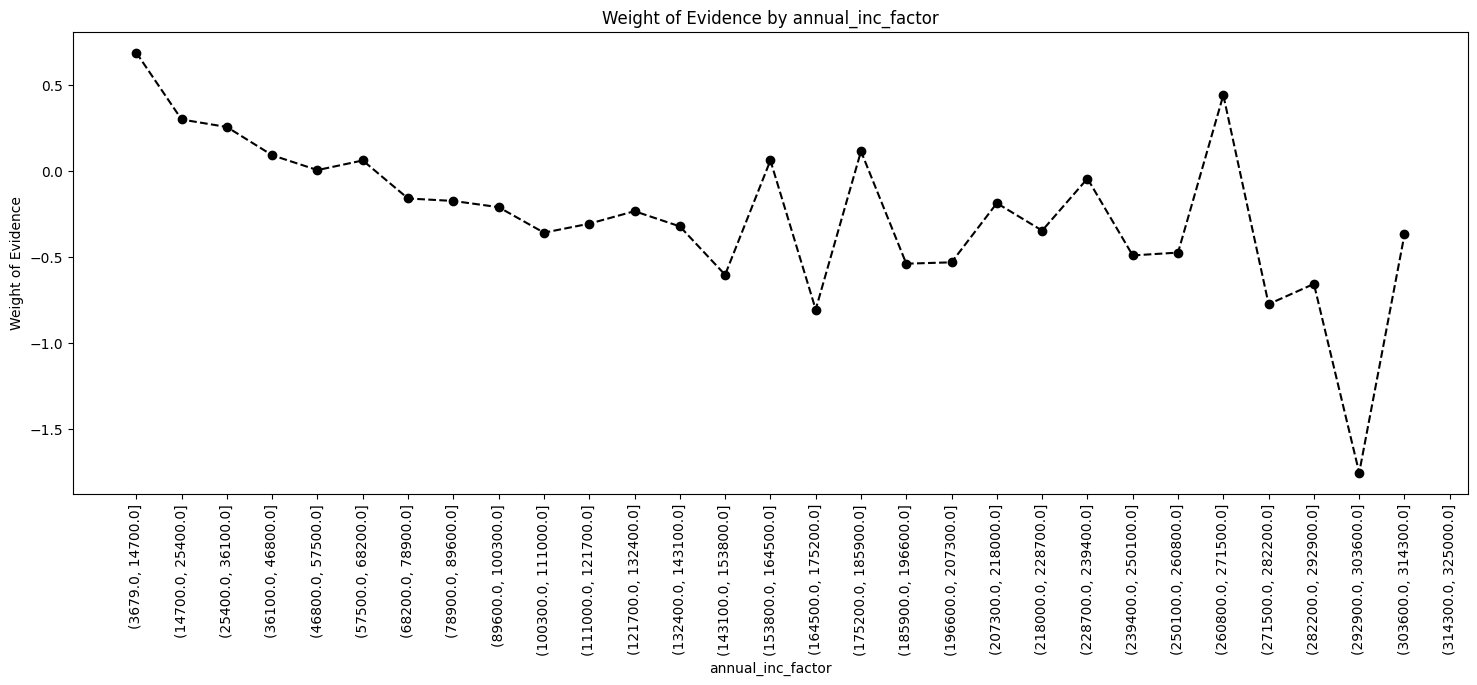

In [41]:
plot_by_woe(df_temp, 90)

From the graph, WoE decreases half hazardly as income increases. I'll group the following categories based on WoE values and number of observations:

Categories:
- <=25k
- 25-89k
- 89-153k
- 153-207k
- 207-260k
- 260-326k
- \>326k

In [42]:
#creating the dummy variables
X_train['annual_income:<25k'] = np.where((X_train['annual_income'] <= 25000), 1, 0)
X_train['annual_income:25k-89k'] = np.where((X_train['annual_income'] > 25000) & (X_train['annual_income'] <= 89000), 1, 0)
X_train['annual_income:89k-153k'] = np.where((X_train['annual_income'] > 89000) & (X_train['annual_income'] <= 153000), 1, 0)
X_train['annual_income:153k-207k'] = np.where((X_train['annual_income'] > 153000) & (X_train['annual_income'] <= 207000), 1, 0)
X_train['annual_income:207k-260k'] = np.where((X_train['annual_income'] > 207000) & (X_train['annual_income'] <= 260000), 1, 0)
X_train['annual_income:260k-326k'] = np.where((X_train['annual_income'] > 260000) & (X_train['annual_income'] <= 326000), 1, 0)
X_train['annual_income:>326k'] = np.where((X_train['annual_income'] > 326000), 1, 0)

In [43]:
#do same for X_test
X_test['annual_inc_factor'] = pd.cut(X_test['annual_income'], 100)

X_test['annual_income:<25k'] = np.where((X_test['annual_income'] <= 25000), 1, 0)
X_test['annual_income:25k-89k'] = np.where((X_test['annual_income'] > 25000) & (X_test['annual_income'] <= 89000), 1, 0)
X_test['annual_income:89k-153k'] = np.where((X_test['annual_income'] > 89000) & (X_test['annual_income'] <= 153000), 1, 0)
X_test['annual_income:153k-207k'] = np.where((X_test['annual_income'] > 153000) & (X_test['annual_income'] <= 207000), 1, 0)
X_test['annual_income:207k-260k'] = np.where((X_test['annual_income'] > 207000) & (X_test['annual_income'] <= 260000), 1, 0)
X_test['annual_income:260k-326k'] = np.where((X_test['annual_income'] > 260000) & (X_test['annual_income'] <= 326000), 1, 0)
X_test['annual_income:>326k'] = np.where((X_test['annual_income'] > 326000), 1, 0)

interest_rate

In [44]:
X_train['int_rate'].unique()

array([0.0729, 0.1649, 0.1036, 0.1316, 0.0542, 0.1361, 0.1171, 0.1199,
       0.0888, 0.0991, 0.092 , 0.1825, 0.1186, 0.1099, 0.1446, 0.0932,
       0.0963, 0.1158, 0.1189, 0.1756, 0.1323, 0.1689, 0.0976, 0.0751,
       0.1484, 0.1261, 0.1407, 0.2062, 0.183 , 0.0603, 0.1065, 0.1454,
       0.1758, 0.1372, 0.1221, 0.1   , 0.0859, 0.1126, 0.1602, 0.1095,
       0.1677, 0.1253, 0.1273, 0.0662, 0.0699, 0.0617, 0.1483, 0.1727,
       0.1411, 0.0849, 0.1632, 0.1435, 0.0749, 0.1037, 0.1599, 0.0999,
       0.1596, 0.1062, 0.079 , 0.1398, 0.0714, 0.167 , 0.1298, 0.1074,
       0.0788, 0.1343, 0.1682, 0.1864, 0.1269, 0.0579, 0.1399, 0.1799,
       0.1111, 0.0925, 0.1367, 0.0692, 0.0599, 0.1114, 0.074 , 0.0654,
       0.1292, 0.1306, 0.1059, 0.1749, 0.2248, 0.1299, 0.1242, 0.1942,
       0.1335, 0.1527, 0.1136, 0.0894, 0.1322, 0.1558, 0.1284, 0.1496,
       0.1146, 0.1904, 0.1899, 0.1427, 0.1357, 0.0945, 0.1491, 0.1039,
       0.1505, 0.1075, 0.1459, 0.1148, 0.1149, 0.1385, 0.0691, 0.1461,
      

In [45]:
X_train['int_rate_factor'] = pd.cut(X_train['int_rate'], 30)

In [46]:
df_temp = woe_ordered_continuous(X_train, 'int_rate_factor', y_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.054, 0.0606]",1339,0.031367,0.043405,42.0,1297.0,0.009845,0.048791,-1.600544,NaN,NaN,0.348164
1,"(0.0606, 0.067]",782,0.060102,0.025349,47.0,735.0,0.011017,0.027649,-0.920128,0.028736,0.680417,0.348164
2,"(0.067, 0.0734]",1362,0.047724,0.044151,65.0,1297.0,0.015237,0.048791,-1.163827,0.012378,0.243699,0.348164
3,"(0.0734, 0.0798]",2658,0.057562,0.086162,153.0,2505.0,0.035865,0.094233,-0.966011,0.009838,0.197816,0.348164
4,"(0.0798, 0.0862]",697,0.083214,0.022594,58.0,639.0,0.013596,0.024038,-0.569866,0.025652,0.396145,0.348164
5,"(0.0862, 0.0925]",845,0.085207,0.027391,72.0,773.0,0.016878,0.029079,-0.544018,0.001993,0.025849,0.348164
6,"(0.0925, 0.0989]",893,0.089586,0.028947,80.0,813.0,0.018753,0.030583,-0.489109,0.004379,0.054908,0.348164
7,"(0.0989, 0.105]",2011,0.104923,0.065188,211.0,1800.0,0.049461,0.067712,-0.314089,0.015337,0.175021,0.348164
8,"(0.105, 0.112]",2821,0.110245,0.091445,311.0,2510.0,0.072902,0.094421,-0.258650,0.005322,0.055439,0.348164
9,"(0.112, 0.118]",1761,0.148779,0.057085,262.0,1499.0,0.061416,0.056389,0.085386,0.038535,0.344036,0.348164


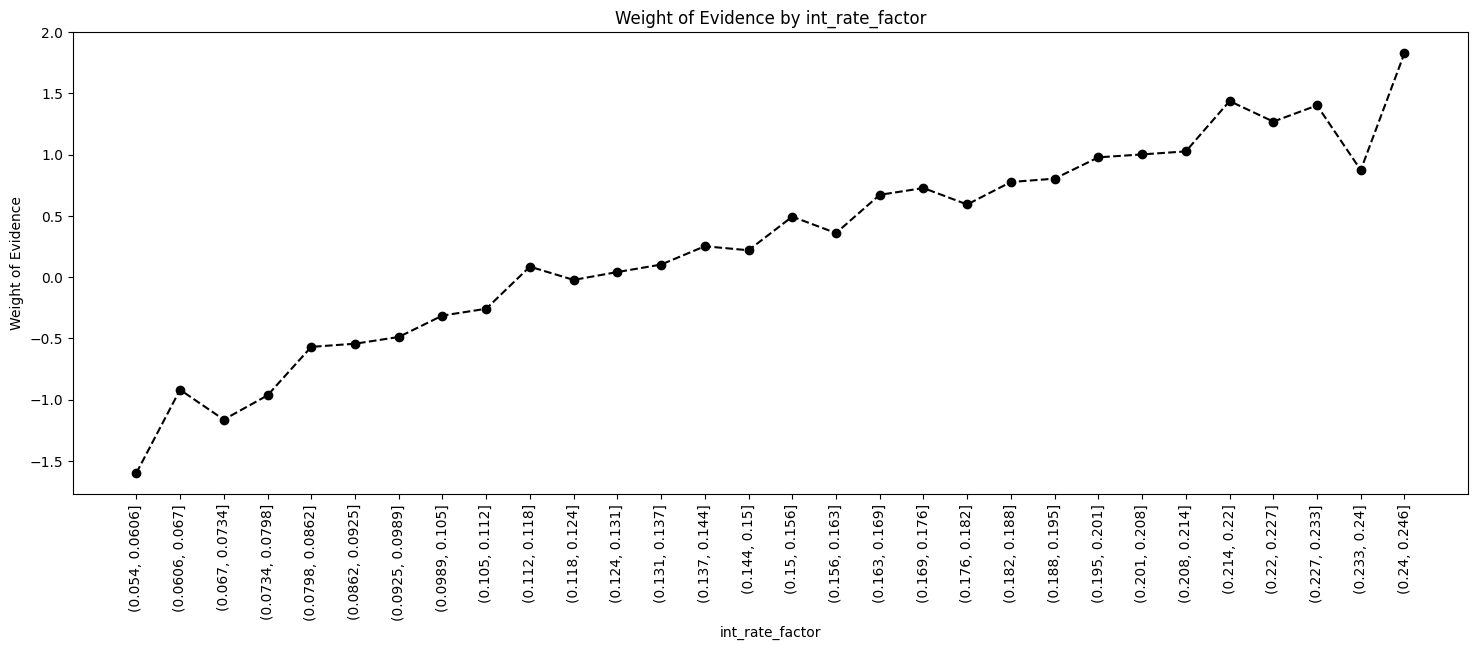

In [47]:
plot_by_woe(df_temp, 90)

The WoE increases steadily as interest rate increases

In [48]:
#creating the dummy variables
X_train['int_rate:<0.07'] = np.where((X_train['int_rate'] <= 0.07), 1, 0)
X_train['int_rate:0.07-0.098'] = np.where((X_train['int_rate'] > 0.07) & (X_train['int_rate'] <= 0.098), 1, 0)
X_train['int_rate:0.098-0.14'] = np.where((X_train['int_rate'] > 0.098) & (X_train['int_rate'] <= 0.14), 1, 0)
X_train['int_rate:0.14-0.18'] = np.where((X_train['int_rate'] > 0.14) & (X_train['int_rate'] <= 0.18), 1, 0)
X_train['int_rate:0.18-0.22'] = np.where((X_train['int_rate'] > 0.18) & (X_train['int_rate'] <= 0.22), 1, 0)
X_train['int_rate:>0.22'] = np.where((X_train['int_rate'] > 0.22), 1, 0)

In [49]:
#creating the dummy variables
X_test['int_rate_factor'] = pd.cut(X_test['int_rate'], 30)

X_test['int_rate:<0.07'] = np.where((X_test['int_rate'] <= 0.07), 1, 0)
X_test['int_rate:0.07-0.098'] = np.where((X_test['int_rate'] > 0.07) & (X_test['int_rate'] <= 0.098), 1, 0)
X_test['int_rate:0.098-0.14'] = np.where((X_test['int_rate'] > 0.098) & (X_test['int_rate'] <= 0.14), 1, 0)
X_test['int_rate:0.14-0.18'] = np.where((X_test['int_rate'] > 0.14) & (X_test['int_rate'] <= 0.18), 1, 0)
X_test['int_rate:0.18-0.22'] = np.where((X_test['int_rate'] > 0.18) & (X_test['int_rate'] <= 0.22), 1, 0)
X_test['int_rate:>0.22'] = np.where((X_test['int_rate'] > 0.22), 1, 0)

dti

In [50]:
X_train['dti'].unique()

array([1.678e-01, 1.491e-01, 1.745e-01, 1.050e-02, 2.904e-01, 2.187e-01,
       3.810e-02, 6.790e-02, 4.810e-02, 6.470e-02, 1.030e-02, 1.990e-02,
       1.360e-01, 1.374e-01, 2.063e-01, 9.250e-02, 1.405e-01, 2.218e-01,
       6.800e-03, 1.447e-01, 1.025e-01, 1.891e-01, 2.201e-01, 1.684e-01,
       2.238e-01, 7.240e-02, 8.000e-02, 2.303e-01, 1.281e-01, 1.741e-01,
       1.499e-01, 7.080e-02, 1.606e-01, 1.395e-01, 2.365e-01, 2.088e-01,
       1.023e-01, 1.416e-01, 1.848e-01, 1.448e-01, 1.148e-01, 1.024e-01,
       9.100e-03, 6.210e-02, 1.735e-01, 6.380e-02, 1.157e-01, 1.712e-01,
       3.710e-02, 1.938e-01, 1.260e-01, 7.520e-02, 1.044e-01, 3.310e-02,
       0.000e+00, 9.780e-02, 1.482e-01, 6.530e-02, 1.524e-01, 1.422e-01,
       1.488e-01, 1.970e-01, 9.470e-02, 1.119e-01, 4.540e-02, 2.080e-01,
       5.750e-02, 2.540e-02, 1.626e-01, 1.585e-01, 1.189e-01, 1.651e-01,
       5.160e-02, 7.600e-03, 1.650e-01, 5.740e-02, 6.240e-02, 6.780e-02,
       1.155e-01, 1.962e-01, 1.428e-01, 8.150e-02, 

In [51]:
X_train['dti_factor'] = pd.cut(X_train['dti'], 50)

In [52]:
df_temp = woe_ordered_continuous(X_train, 'dti_factor', y_train)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.0003, 0.00599]",457,0.109409,0.014814,50.0,407.0,0.011721,0.015311,-0.267195,NaN,NaN,0.03373
1,"(0.00599, 0.012]",387,0.136951,0.012545,53.0,334.0,0.012424,0.012564,-0.011254,0.027542,0.255941,0.03373
2,"(0.012, 0.018]",408,0.142157,0.013226,58.0,350.0,0.013596,0.013166,0.032105,0.005206,0.043359,0.03373
3,"(0.018, 0.024]",432,0.115741,0.014004,50.0,382.0,0.011721,0.014370,-0.203802,0.026416,0.235907,0.03373
4,"(0.024, 0.03]",443,0.112867,0.014360,50.0,393.0,0.011721,0.014784,-0.232191,0.002874,0.028389,0.03373
5,"(0.03, 0.0359]",465,0.118280,0.015073,55.0,410.0,0.012893,0.015423,-0.179229,0.005413,0.052963,0.03373
6,"(0.0359, 0.0419]",538,0.124535,0.017440,67.0,471.0,0.015706,0.017718,-0.120570,0.006256,0.058658,0.03373
7,"(0.0419, 0.0479]",590,0.132203,0.019125,78.0,512.0,0.018284,0.019260,-0.052021,0.007668,0.068550,0.03373
8,"(0.0479, 0.0539]",634,0.089905,0.020552,57.0,577.0,0.013361,0.021706,-0.485196,0.042298,0.433175,0.03373
9,"(0.0539, 0.0599]",633,0.102686,0.020519,65.0,568.0,0.015237,0.021367,-0.338139,0.012780,0.147057,0.03373


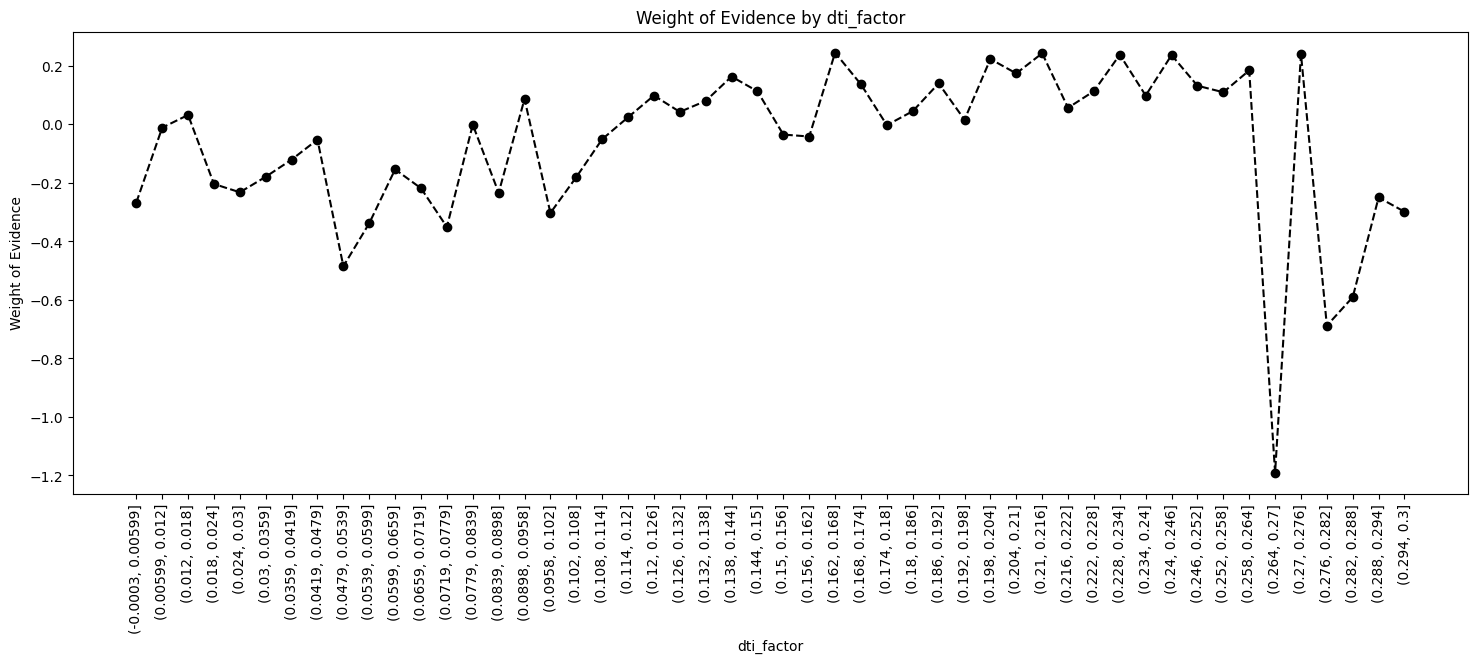

In [53]:
plot_by_woe(df_temp, 90)

The WoE increases choppily as debt to income ratio increases

In [54]:
#creating the dummy variables
X_train['dti:<0.06'] = np.where((X_train['dti'] <= 0.06), 1, 0)
X_train['dti:0.06-0.10'] = np.where((X_train['dti'] > 0.06) & (X_train['dti'] <= 0.10), 1, 0)
X_train['dti:0.10-0.16'] = np.where((X_train['dti'] > 0.10) & (X_train['dti'] <= 0.16), 1, 0)
X_train['dti:0.16-0.19'] = np.where((X_train['dti'] > 0.16) & (X_train['dti'] <= 0.19), 1, 0)
X_train['dti:0.19-0.24'] = np.where((X_train['dti'] > 0.19) & (X_train['dti'] <= 0.24), 1, 0)
X_train['dti:>0.24'] = np.where((X_train['dti'] > 0.24), 1, 0)

In [55]:
#creating the dummy variables
X_test['dti_factor'] = pd.cut(X_test['dti'], 50)

X_test['dti:<0.06'] = np.where((X_test['dti'] <= 0.06), 1, 0)
X_test['dti:0.06-0.10'] = np.where((X_test['dti'] > 0.06) & (X_test['dti'] <= 0.10), 1, 0)
X_test['dti:0.10-0.16'] = np.where((X_test['dti'] > 0.10) & (X_test['dti'] <= 0.16), 1, 0)
X_test['dti:0.16-0.19'] = np.where((X_test['dti'] > 0.16) & (X_test['dti'] <= 0.19), 1, 0)
X_test['dti:0.19-0.24'] = np.where((X_test['dti'] > 0.19) & (X_test['dti'] <= 0.24), 1, 0)
X_test['dti:>0.24'] = np.where((X_test['dti'] > 0.24), 1, 0)

loan_amount

In [56]:
X_train['loan_amount_factor'] = pd.cut(X_train['loan_amount'], 50)

In [57]:
df_temp = woe_ordered_continuous(X_train, 'loan_amount_factor', y_train)
df_temp

,loan_amount_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",231,0.125541,0.007488,29.0,202.0,0.006798,0.007599,-0.111377,NaN,NaN,0.041807
1,"(1190.0, 1880.0]",590,0.145763,0.019125,86.0,504.0,0.020159,0.018959,0.061366,0.020222,0.172743,0.041807
2,"(1880.0, 2570.0]",1066,0.139775,0.034555,149.0,917.0,0.034927,0.034496,0.012434,0.005988,0.048932,0.041807
3,"(2570.0, 3260.0]",1216,0.122533,0.039418,149.0,1067.0,0.034927,0.040138,-0.139065,0.017242,0.151499,0.041807
4,"(3260.0, 3950.0]",658,0.132219,0.021330,87.0,571.0,0.020394,0.021480,-0.051886,0.009686,0.087179,0.041807
5,"(3950.0, 4640.0]",1444,0.118421,0.046809,171.0,1273.0,0.040084,0.047888,-0.177873,0.013798,0.125987,0.041807
6,"(4640.0, 5330.0]",2212,0.137432,0.071704,304.0,1908.0,0.071261,0.071775,-0.007188,0.019011,0.170685,0.041807
7,"(5330.0, 6020.0]",2029,0.113356,0.065772,230.0,1799.0,0.053915,0.067675,-0.227312,0.024076,0.220124,0.041807
8,"(6020.0, 6710.0]",695,0.099281,0.022529,69.0,626.0,0.016174,0.023549,-0.375649,0.014076,0.148337,0.041807
9,"(6710.0, 7400.0]",1275,0.120784,0.041330,154.0,1121.0,0.036099,0.042170,-0.155429,0.021504,0.220220,0.041807


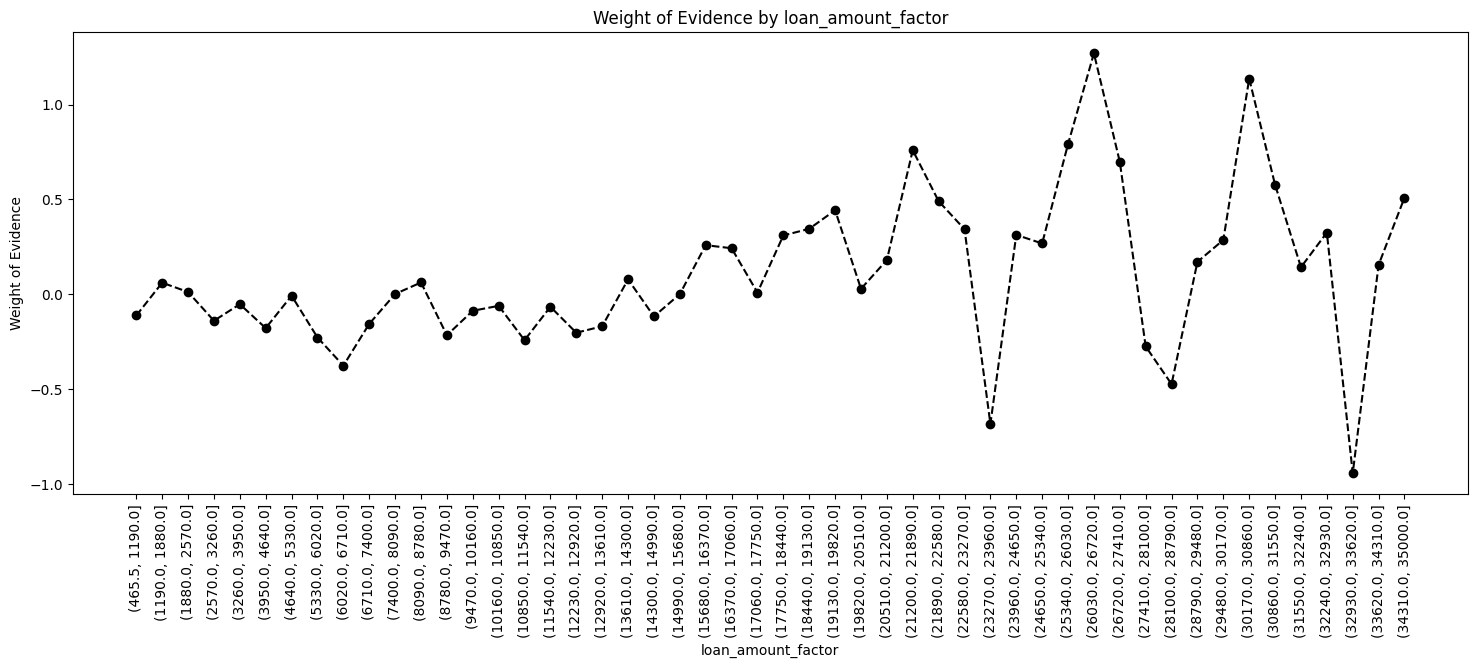

In [58]:
plot_by_woe(df_temp, 90)

In [59]:
#creating the dummy variables
X_train['loan_amount:<4600'] = np.where((X_train['loan_amount'] <= 4600), 1, 0)
X_train['loan_amount:4600-8k'] = np.where((X_train['loan_amount'] > 4600) & (X_train['loan_amount'] <= 8000), 1, 0)
X_train['loan_amount:8k-14k'] = np.where((X_train['loan_amount'] > 8000) & (X_train['loan_amount'] <= 14000), 1, 0)
X_train['loan_amount:14k-20k'] = np.where((X_train['loan_amount'] > 14000) & (X_train['loan_amount'] <= 20000), 1, 0)
X_train['loan_amount:20k-25k'] = np.where((X_train['loan_amount'] > 20000) & (X_train['loan_amount'] <= 25000), 1, 0)
X_train['loan_amount:25k-29k'] = np.where((X_train['loan_amount'] > 25000) & (X_train['loan_amount'] <= 29000), 1, 0)
X_train['loan_amount:>29k'] = np.where((X_train['loan_amount'] > 29000), 1, 0)

In [60]:
#creating the dummy variables
X_test['loan_amount_factor'] = pd.cut(X_test['loan_amount'], 50)

X_test['loan_amount:<4600'] = np.where((X_test['loan_amount'] <= 4600), 1, 0)
X_test['loan_amount:4600-8k'] = np.where((X_test['loan_amount'] > 4600) & (X_test['loan_amount'] <= 8000), 1, 0)
X_test['loan_amount:8k-14k'] = np.where((X_test['loan_amount'] > 8000) & (X_test['loan_amount'] <= 14000), 1, 0)
X_test['loan_amount:14k-20k'] = np.where((X_test['loan_amount'] > 14000) & (X_test['loan_amount'] <= 20000), 1, 0)
X_test['loan_amount:20k-25k'] = np.where((X_test['loan_amount'] > 20000) & (X_test['loan_amount'] <= 25000), 1, 0)
X_test['loan_amount:25k-29k'] = np.where((X_test['loan_amount'] > 25000) & (X_test['loan_amount'] <= 29000), 1, 0)
X_test['loan_amount:>29k'] = np.where((X_test['loan_amount'] > 29000), 1, 0)

#### Data Preparation

In [61]:
print(X_train.shape), print(X_test.shape)

(30849, 72)
(7713, 72)


(None, None)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30849 entries, 696 to 20206
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   address_state                        30849 non-null  object  
 1   emp_length                           30849 non-null  object  
 2   grade                                30849 non-null  object  
 3   home_ownership                       30849 non-null  object  
 4   purpose                              30849 non-null  object  
 5   sub_grade                            30849 non-null  object  
 6   term                                 30849 non-null  object  
 7   verification_status                  30849 non-null  object  
 8   annual_income                        30849 non-null  float64 
 9   dti                                  30849 non-null  float64 
 10  installment                          30849 non-null  float64 
 11  int_rate          

In [63]:
X_train.columns

Index(['address_state', 'emp_length', 'grade', 'home_ownership', 'purpose',
       'sub_grade', 'term', 'verification_status', 'annual_income', 'dti',
       'installment', 'int_rate', 'loan_amount', 'total_acc', 'emp_length_ft',
       'address_state_ft', 'purpose_ft', 'grade_ft', 'sub_grade_ft',
       'term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'monthly_income', 'payment_to_income_ratio', 'loan_to_income_ratio',
       'residual_income', 'is_new_credit_user', 'log_total_acc', 'term_months',
       'interest_burden_ratio', 'payment_to_income_ratio_binned',
       'loan_to_income_ratio_binned', 'residual_income_binned',
       'interest_burden_ratio_binned', 'risk_profile', 'annual_inc_factor',
       'annual_income:<25k', 'annual_inc

Encode the new categorical features: 'payment_to_income_ratio_binned',
       'loan_to_income_ratio_binned', 'residual_income_binned',
       'interest_burden_ratio_binned', 'risk_profile'

In [64]:
X_train[['payment_to_income_ratio_binned', 'loan_to_income_ratio_binned', 'residual_income_binned',
 'interest_burden_ratio_binned', 'risk_profile']].head(10)

,payment_to_income_ratio_binned,loan_to_income_ratio_binned,residual_income_binned,interest_burden_ratio_binned,risk_profile
696,PTI_Low,LTI_Low,ResInc_Medium,IntBur_Low,PTI_Low_LTI_Low_ResInc_Medium_IntBur_Low
28192,PTI_Medium,LTI_Medium,ResInc_High,IntBur_High,PTI_Medium_LTI_Medium_ResInc_High_IntBur_High
31360,PTI_High,LTI_High,ResInc_Low,IntBur_Low,PTI_High_LTI_High_ResInc_Low_IntBur_Low
3553,PTI_Low,LTI_Low,ResInc_High,IntBur_Medium,PTI_Low_LTI_Low_ResInc_High_IntBur_Medium
25211,PTI_Low,LTI_Low,ResInc_Medium,IntBur_Low,PTI_Low_LTI_Low_ResInc_Medium_IntBur_Low
22766,PTI_Low,LTI_Low,ResInc_High,IntBur_High,PTI_Low_LTI_Low_ResInc_High_IntBur_High
18364,PTI_Low,LTI_Low,ResInc_High,IntBur_Medium,PTI_Low_LTI_Low_ResInc_High_IntBur_Medium
21263,PTI_Medium,LTI_High,ResInc_Medium,IntBur_Low,PTI_Medium_LTI_High_ResInc_Medium_IntBur_Low
31175,PTI_Medium,LTI_Medium,ResInc_High,IntBur_Low,PTI_Medium_LTI_Medium_ResInc_High_IntBur_Low
34170,PTI_Low,LTI_Low,ResInc_High,IntBur_Low,PTI_Low_LTI_Low_ResInc_High_IntBur_Low


In [65]:
cat_col_to_encode = ['payment_to_income_ratio_binned', 'loan_to_income_ratio_binned', 'residual_income_binned','interest_burden_ratio_binned']

for col in cat_col_to_encode:
    X_train_ohe = pd.get_dummies(X_train[col], prefix=col).astype(int)
    X_train = pd.concat([X_train, X_train_ohe], axis=1)

    X_test_ohe = pd.get_dummies(X_test[col], prefix=col).astype(int)
    X_test = pd.concat([X_test, X_test_ohe], axis=1)
display(X_train.head())

,address_state,emp_length,grade,home_ownership,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,emp_length_ft,address_state_ft,purpose_ft,grade_ft,sub_grade_ft,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,monthly_income,payment_to_income_ratio,loan_to_income_ratio,residual_income,is_new_credit_user,log_total_acc,term_months,interest_burden_ratio,payment_to_income_ratio_binned,loan_to_income_ratio_binned,residual_income_binned,interest_burden_ratio_binned,risk_profile,annual_inc_factor,annual_income:<25k,annual_income:25k-89k,annual_income:89k-153k,annual_income:153k-207k,annual_income:207k-260k,annual_income:260k-326k,annual_income:>326k,int_rate_factor,int_rate:<0.07,int_rate:0.07-0.098,int_rate:0.098-0.14,int_rate:0.14-0.18,int_rate:0.18-0.22,int_rate:>0.22,dti_factor,dti:<0.06,dti:0.06-0.10,dti:0.10-0.16,dti:0.16-0.19,dti:0.19-0.24,dti:>0.24,loan_amount_factor,loan_amount:<4600,loan_amount:4600-8k,loan_amount:8k-14k,loan_amount:14k-20k,loan_amount:20k-25k,loan_amount:25k-29k,loan_amount:>29k,payment_to_income_ratio_binned_PTI_Low,payment_to_income_ratio_binned_PTI_Medium,payment_to_income_ratio_binned_PTI_High,loan_to_income_ratio_binned_LTI_Low,loan_to_income_ratio_binned_LTI_Medium,loan_to_income_ratio_binned_LTI_High,residual_income_binned_ResInc_Low,residual_income_binned_ResInc_Medium,residual_income_binned_ResInc_High,interest_burden_ratio_binned_IntBur_Low,interest_burden_ratio_binned_IntBur_Medium,interest_burden_ratio_binned_IntBur_High
696,MD,4 years,A,RENT,car,A4,36 months,Source Verified,70000.0,0.1678,186.06,0.0729,6000,11,0,798,1195,1,4,1,0,0,1,0,0,0,0,0,1,5833.333333,0.031896,0.085714,5647.273333,0,2.484907,36,1.116360,PTI_Low,LTI_Low,ResInc_Medium,IntBur_Low,PTI_Low_LTI_Low_ResInc_Medium_IntBur_Low,"(66720.0, 75680.0]",0,1,0,0,0,0,0,"(0.067, 0.0734]",0,1,0,0,0,0,"(0.168, 0.174]",0,0,0,1,0,0,"(5330.0, 6020.0]",0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
28192,MD,1 year,D,RENT,house,D3,60 months,Verified,85000.0,0.1491,351.49,0.1649,14300,21,0,798,296,4,18,0,1,0,0,1,0,0,0,0,1,7083.333333,0.049622,0.168235,6731.843333,0,3.091042,60,1.474783,PTI_Medium,LTI_Medium,ResInc_High,IntBur_High,PTI_Medium_LTI_Medium_ResInc_High_IntBur_High,"(84640.0, 93600.0]",0,1,0,0,0,0,0,"(0.163, 0.169]",0,0,0,1,0,0,"(0.144, 0.15]",0,0,1,0,0,0,"(13610.0, 14300.0]",0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
31360,MD,< 1 year,B,RENT,moving,B5,36 months,Source Verified,12240.0,0.1745,105.42,0.1036,3250,11,0,798,438,2,10,1,0,0,1,0,0,0,0,0,1,1020.000000,0.103353,0.265523,914.580000,0,2.484907,36,1.167729,PTI_High,LTI_High,ResInc_Low,IntBur_Low,PTI_High_LTI_High_ResInc_Low_IntBur_Low,"(3104.0, 12960.0]",1,0,0,0,0,0,0,"(0.0989, 0.105]",0,0,1,0,0,0,"(0.174, 0.18]",0,0,0,1,0,0,"(2570.0, 3260.0]",1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3553,NJ,10+ years,C,RENT,credit card,C3,36 months,Not Verified,72000.0,0.0105,81.05,0.1316,2400,7,1,1443,3999,3,13,1,0,1,0,0,0,0,0,0,1,6000.000000,0.013508,0.033333,5918.950000,0,2.079442,36,1.215750,PTI_Low,LTI_Low,ResInc_High,IntBur_Medium,PTI_Low_LTI_Low_ResInc_High_IntBur_Medium,"(66720.0, 75680.0]",0,1,0,0,0,0,0,"(0.131, 0.137]",0,0,1,0,0,0,"(0.00599, 0.012]",1,0,0,0,0,0,"(1880.0, 2570.0]",1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
25211,MI,10+ years,A,MORTGAGE,home improvement,A1,36 months,Not Verified,65000.0,0.2904,60.32,0.0542,2000,34,1,556,2260,1,1,1,0,1,0,0,1,0,0,0,0,5416.666667,0.011136,0.030769,5356.346667,0,3.555348,36,1.085760,PTI_Low,LTI_Low,ResInc_Medium,IntBur_Low,PTI_Low_LTI_Low_ResInc_Medium_IntBur_Low,"(57760.0, 66720.0]",0,1,0,0,0,0,0,"(0.054, 0.0606]",1,0,0,0,0,0,"(0.288, 0.294]",0,0,0,0,0,1,"(1880.0, 2570.0]",1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [66]:
X_train['risk_profile'] = X_train['risk_profile'].map(X_train['risk_profile'].value_counts())
X_test['risk_profile'] = X_test['risk_profile'].map(X_test['risk_profile'].value_counts())

Drop columns irrelevant to model training

In [67]:
cols_to_drop = ['address_state', 'emp_length', 'grade', 'home_ownership', 'purpose',
       'sub_grade', 'term', 'verification_status', 'total_acc',
       'annual_income', 'dti', 'installment', 'term_months',
       'payment_to_income_ratio_binned', 'loan_to_income_ratio_binned', 'residual_income_binned',
       'interest_burden_ratio_binned', 'risk_profile', 'annual_inc_factor',
       'int_rate_factor', 'dti_factor', 'loan_amount_factor']

noisy_cols_from_onehotencoding = ['term_ 60 months', 'verification_status_Source Verified', 'home_ownership_OTHER',
                                   'annual_income:>326k', 'int_rate:<0.07', 'dti:<0.06', 'loan_amount:<4600']

In [68]:
X_train = X_train.drop(cols_to_drop, axis=1)
X_train = X_train.drop(noisy_cols_from_onehotencoding, axis=1)

In [69]:
X_test = X_test.drop(cols_to_drop, axis=1)
X_test = X_test.drop(noisy_cols_from_onehotencoding, axis=1)

In [70]:
print(X_train.shape), print(X_test.shape)

(30849, 55)
(7713, 55)


(None, None)

In [71]:
X_train.columns

Index(['int_rate', 'loan_amount', 'emp_length_ft', 'address_state_ft',
       'purpose_ft', 'grade_ft', 'sub_grade_ft', 'term_ 36 months',
       'verification_status_Not Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'monthly_income', 'payment_to_income_ratio',
       'loan_to_income_ratio', 'residual_income', 'is_new_credit_user',
       'log_total_acc', 'interest_burden_ratio', 'annual_income:<25k',
       'annual_income:25k-89k', 'annual_income:89k-153k',
       'annual_income:153k-207k', 'annual_income:207k-260k',
       'annual_income:260k-326k', 'int_rate:0.07-0.098', 'int_rate:0.098-0.14',
       'int_rate:0.14-0.18', 'int_rate:0.18-0.22', 'int_rate:>0.22',
       'dti:0.06-0.10', 'dti:0.10-0.16', 'dti:0.16-0.19', 'dti:0.19-0.24',
       'dti:>0.24', 'loan_amount:4600-8k', 'loan_amount:8k-14k',
       'loan_amount:14k-20k', 'loan_amount:20k-25k', 'loan_amount:25k-29k',
     

#### Conclusion

I'll be using two models: logistic regression and random forest/xgboost.
- I'll use just categorical data for the logistic regression model 
- I'll experiment with two set of data for the random forest/xgbosst model

In [72]:
data_for_log_reg = ['emp_length_ft', 'address_state_ft', 'purpose_ft', 'grade_ft', 'sub_grade_ft',
       'term_ 36 months', 'verification_status_Not Verified',
       'verification_status_Verified', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'is_new_credit_user', 'annual_income:<25k', 'annual_income:25k-89k',
       'annual_income:89k-153k', 'annual_income:153k-207k',
       'annual_income:207k-260k', 'annual_income:260k-326k',
       'int_rate:0.07-0.098', 'int_rate:0.098-0.14', 'int_rate:0.14-0.18',
       'int_rate:0.18-0.22', 'int_rate:>0.22', 'dti:0.06-0.10',
       'dti:0.10-0.16', 'dti:0.16-0.19', 'dti:0.19-0.24', 'dti:>0.24',
       'loan_amount:4600-8k', 'loan_amount:8k-14k', 'loan_amount:14k-20k',
       'loan_amount:20k-25k', 'loan_amount:25k-29k', 'loan_amount:>29k',
       'payment_to_income_ratio_binned_PTI_Low',
       'payment_to_income_ratio_binned_PTI_Medium',
       'payment_to_income_ratio_binned_PTI_High',
       'loan_to_income_ratio_binned_LTI_Low',
       'loan_to_income_ratio_binned_LTI_Medium',
       'loan_to_income_ratio_binned_LTI_High',
       'residual_income_binned_ResInc_Low',
       'residual_income_binned_ResInc_Medium',
       'residual_income_binned_ResInc_High',
       'interest_burden_ratio_binned_IntBur_Low',
       'interest_burden_ratio_binned_IntBur_Medium',
       'interest_burden_ratio_binned_IntBur_High']

In [ ]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(30849, 55)
(7713, 55)
(30849,)
(7713,)


(None, None, None, None)

In [74]:
X_train_log = X_train[data_for_log_reg]

In [76]:
X_test_log = X_test[data_for_log_reg]

In [77]:
print(X_train_log.shape), print(X_test_log.shape), print(y_train.shape), print(y_test.shape)

(30849, 47)
(7713, 47)
(30849,)
(7713,)


(None, None, None, None)

In [ ]:
X_train.to_csv(r'/loan_api_project/data/X_train_data.csv', index=False) 
X_test.to_csv(r'/loan_api_project/data/X_test_data.csv', index=False) 
X_train_log.to_csv(r'/loan_api_project/data/X_train_log_data.csv', index=False) 
X_test_log.to_csv(r'/loan_api_project/data/X_test_log_data.csv', index=False) 
y_train.to_csv(r'/loan_api_project/data/y_train_data.csv', index=False) 
y_test.to_csv(r'/loan_api_project/data/y_test_data.csv', index=False) 
